<a href="https://colab.research.google.com/github/LucasSFlores80/Data-Science-I/blob/main/An%C3%A1lisis_de_casos_de_decesos_por_diferentes_factores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga del Dataset

Primero se cargan las librerías necesarias

En este caso se utiliza pandas y numpy



In [1]:
import pandas as pd
import numpy as np

Se carga el dataset teniendo en cuenta que se trata de un archivo con extensión .csv.

Fuente del dataset: https://www.kaggle.com/datasets/muhammadumairab/number-of-deaths-by-risk-factor




In [2]:
url = 'https://raw.githubusercontent.com/LucasSFlores80/Data-Science-I/main/number-of-deaths-by-risk-factor.csv'
riesgo = pd.read_csv(url)
riesgo

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


Se observa que el dataset consta de 31 columnas y 6480 filas. La información que brinda el dataset es la cantidad de decesos por tipo de riesgo en distintos países y regiones en un intervalo de años (1990-2019).

Analizo las columnas del dataset para conocer que información brinda cada una. Muestra el nombre de los países, un código de país, el año y los diferentes riesgos en la salud.
Salvo las variables Entity y Code que son de tipo string, el resto son variables tipo número entero (int).

In [3]:
riesgo .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Entity                                                                                                            6840 non-null   object
 1   Code                                                                                                              6150 non-null   object
 2   Year                                                                                                              6840 non-null   int64 
 3   Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)              6840 non-null   int64 
 4   Deaths - Cause: All causes - Risk: H

El nombre o índice de las columnas de los riegos es muy extensa en todos los casos. Por lo tanto, es recomendable cambiarlos por otro tipo de nombre.

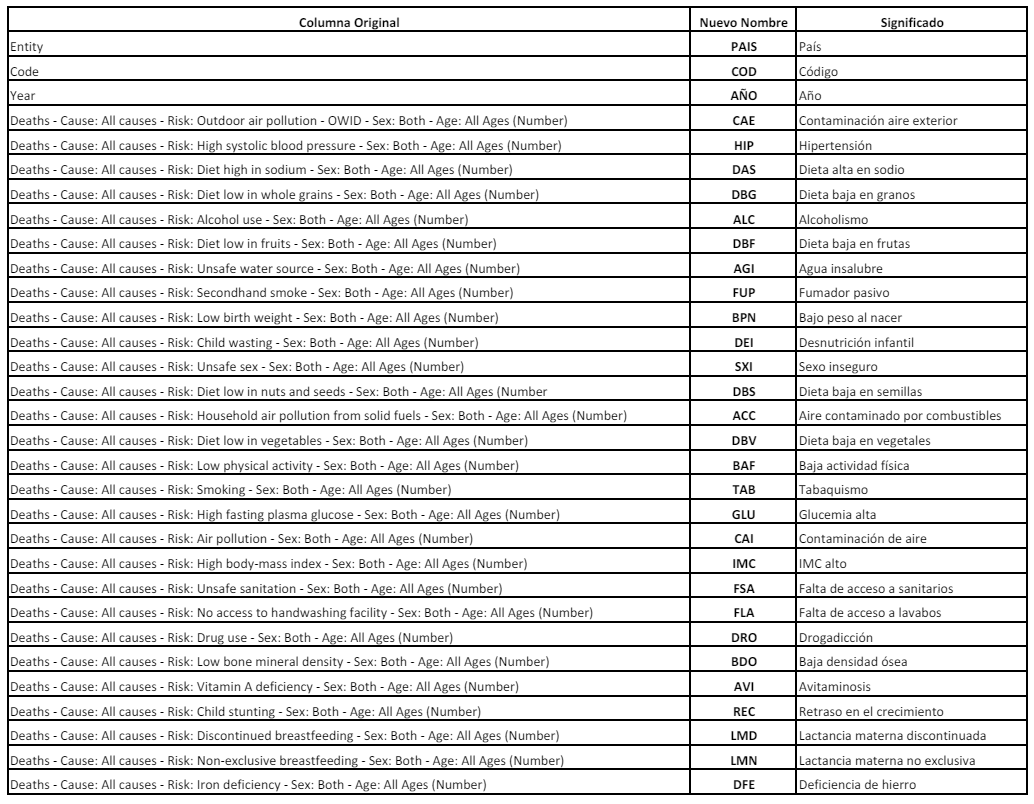

Se renombran las columnas de acuerdo a la tabla

In [4]:
riesgo_1 = riesgo.rename(columns={"Entity":"PAIS","Code":"COD", "Year":"AÑO","Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)":"CAE","Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)":"HIP","Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)":"DAS","Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)":"DBG","Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)":"ALC","Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)":"DBF","Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)":"AGI","Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)":"FUP","Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)":"BPN","Deaths - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)":"DEI","Deaths - Cause: All causes - Risk: Unsafe sex - Sex: Both - Age: All Ages (Number)":"SXI","Deaths - Cause: All causes - Risk: Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)":"DBS","Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)":"ACC","Deaths - Cause: All causes - Risk: Diet low in vegetables - Sex: Both - Age: All Ages (Number)":"DBV","Deaths - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)":"BAF","Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)":"TAB","Deaths - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)":"GLU","Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)":"CAI","Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)":"IMC","Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)":"FSA","Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)":"FLA","Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)":"DRO","Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)":"BDO","Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)":"AVI","Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)":"REC","Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)":"LMD","Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)":"LMN","Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)":"DFE"})

Se comprueba que los cambios fueron correctos

In [5]:
riesgo_1.columns

Index(['PAIS', 'COD', 'AÑO', 'CAE', 'HIP', 'DAS', 'DBG', 'ALC', 'DBF', 'AGI',
       'FUP', 'BPN', 'DEI', 'SXI', 'DBS', 'ACC', 'DBV', 'BAF', 'TAB', 'GLU',
       'CAI', 'IMC', 'FSA', 'FLA', 'DRO', 'BDO', 'AVI', 'REC', 'LMD', 'LMN',
       'DFE'],
      dtype='object')

Se vuelve a mostrar el dataset para ver si realmente se hicieron los cambios

In [6]:
riesgo_1.head()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [35]:
riesgo_1.tail()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261
6839,Zimbabwe,ZWE,2019,2680,12241,1140,1475,5156,1960,3914,...,6475,2531,4113,963,438,81,585,16,631,259


# Análisis de datos nulos
Se determina la cantidad de datos nulos y como influyen en el dataset y el análisis de las variables.

Total de datos nulos

In [7]:
riesgo_1.isnull().sum().sum()

690

Son 690 datos nulos. Se analiza en que columna están los datos nulos

In [8]:
riesgo_1.isnull().sum()

PAIS      0
COD     690
AÑO       0
CAE       0
HIP       0
DAS       0
DBG       0
ALC       0
DBF       0
AGI       0
FUP       0
BPN       0
DEI       0
SXI       0
DBS       0
ACC       0
DBV       0
BAF       0
TAB       0
GLU       0
CAI       0
IMC       0
FSA       0
FLA       0
DRO       0
BDO       0
AVI       0
REC       0
LMD       0
LMN       0
DFE       0
dtype: int64

Se decide cambiar los datos nulos por la palabra "REGION", dado que, en un análisis visual del dataset se encuentra que los datos nulos corresponden a regiones como América Latina o los países que forman Reino Unido.

Estos datos no se borran, sino, que se agrupan para poder ser analizados y comparados con otros datos, como los países. Por ejemplo, si se toma América Latina, se puede comparar los datos de los riesgos de muerte con los países que forman la región.

In [9]:
riesgo_2 = riesgo_1.fillna('REGION')

Se comprueba si quedaron datos nulos

In [10]:
riesgo_2.isnull().sum().sum()

0

Se comprueba la no existencia de datos nulos por columna del dataset

In [11]:
riesgo_2.isnull().sum()

PAIS    0
COD     0
AÑO     0
CAE     0
HIP     0
DAS     0
DBG     0
ALC     0
DBF     0
AGI     0
FUP     0
BPN     0
DEI     0
SXI     0
DBS     0
ACC     0
DBV     0
BAF     0
TAB     0
GLU     0
CAI     0
IMC     0
FSA     0
FLA     0
DRO     0
BDO     0
AVI     0
REC     0
LMD     0
LMN     0
DFE     0
dtype: int64

Se hace una búsqueda en el dataset utilizando como palabra clave "REGION" en la columna de COD.

In [12]:
region = riesgo_2.loc[riesgo_2['COD']=='REGION']
region

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
30,African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
31,African Region (WHO),REGION,1991,96436,365975,47439,46897,179795,44504,829073,...,123606,618112,481775,10201,14292,100842,308125,11186,175016,18768
32,African Region (WHO),REGION,1992,99700,377948,48304,48317,184243,45996,819085,...,129692,610436,480386,12749,14774,99075,307088,11006,172502,19064
33,African Region (WHO),REGION,1993,101913,386490,48805,49393,186482,46972,815640,...,132880,607549,480444,15605,15037,97309,305786,10929,172418,19209
34,African Region (WHO),REGION,1994,105532,398794,49520,50736,191043,48357,832168,...,139411,619531,488628,19030,15490,96777,306251,10970,174425,19504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,World Bank Upper Middle Income,REGION,2015,1953125,4298815,1046866,711062,961051,348914,34910,...,1804399,16788,37778,158483,131969,251,5176,728,9657,1985
6746,World Bank Upper Middle Income,REGION,2016,1969630,4389967,1065553,724482,968200,350770,34179,...,1860369,16072,37789,161699,135254,246,4929,681,9098,1903
6747,World Bank Upper Middle Income,REGION,2017,1965467,4440677,1076496,733454,969102,350295,33561,...,1901543,15374,36961,161312,137207,223,4508,645,8192,1811
6748,World Bank Upper Middle Income,REGION,2018,1976456,4514262,1089508,746871,982487,352573,32732,...,1955352,14565,36002,162808,139013,197,4056,599,7479,1767


Los cambios han sido correctos. Ahora resta saber cuales son las regiones en cuestión. Para hacer esto, se realiza una búsqueda de COD con la clave "REGION" y un solo año para poder registrar todas ellas.

In [13]:
region.loc[(region['COD']=='REGION') & (region['AÑO']==1990)]

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
30,African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
1620,East Asia & Pacific (WB),REGION,1990,792223,1973214,755103,210099,528615,297249,275997,...,387912,206690,139031,110484,56573,21453,140216,5542,113390,8918
1650,Eastern Mediterranean Region (WHO),REGION,1990,167123,405188,21227,102805,18994,34370,208692,...,168996,156608,83308,7917,10072,27726,95377,4342,54890,6665
1770,England,REGION,1990,36407,156715,9076,30295,6497,13775,6,...,52247,1,326,1381,2186,0,7,1,30,7
1950,Europe & Central Asia (WB),REGION,1990,622626,2384980,309584,514849,501232,193996,13647,...,941856,10934,12788,42044,53416,767,11575,660,14463,761
1980,European Region (WHO),REGION,1990,627103,2399430,312367,518009,502397,194493,13734,...,947836,10984,12806,42225,53617,774,11598,669,14556,763
2100,G20,REGION,1990,1729558,5083835,1076589,842300,1253650,608857,1174104,...,1606024,892544,519419,197175,160938,60853,331514,14476,211652,39318
3120,Latin America & Caribbean (WB),REGION,1990,105709,368306,54633,68240,143156,31306,94378,...,200289,61138,44000,8813,14001,3543,22351,5334,40400,2564
3690,Middle East & North Africa (WB),REGION,1990,140163,289453,11770,77193,9881,18177,63314,...,149018,50222,24388,4073,7935,5562,29386,2025,29199,2125
4200,North America (WB),REGION,1990,110408,543428,35613,112336,84305,46114,92,...,249856,93,860,26578,12258,0,43,11,211,62


Las Regiones son:

*   African Region (WHO)
*   East Asia & Pacific (WB)
*   Eastern Mediterranean Region (WHO)
*   England
*   Europe & Central Asia (WB)
*   European Region (WHO)
*   G20
*   Latin America & Caribbean (WB)
*   Middle East & North Africa (WB)
*   North America (WB)
*   Northern Ireland
*   OECD Countries
*   Region of the Americas (WHO)
*   Scotland
*   South Asia (WB)
*   South-East Asia Region (WHO)
*   Sub-Saharan Africa (WB)
*   Wales
*   Western Pacific Region (WHO)
*   World Bank High Income
*   World Bank Low Income
*   World Bank Lower Middle Income
*   World Bank Upper Middle Income

Finalmente, el dataset que se va a utilizar es el modificado con los índices de las columnas y los datos nulos reemplazados con la palabra "REGION".

Esto sería: **riesgo_2**

Si se quiere trabajar solamente con las regiones geográficas, se utiliza el dataset modificado con la palabra clave **region**

# Dataset riesgo_2

In [44]:
riesgo_2.head()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [45]:
riesgo_2

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


# Dataset region

In [15]:
region.head()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
30,African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
31,African Region (WHO),REGION,1991,96436,365975,47439,46897,179795,44504,829073,...,123606,618112,481775,10201,14292,100842,308125,11186,175016,18768
32,African Region (WHO),REGION,1992,99700,377948,48304,48317,184243,45996,819085,...,129692,610436,480386,12749,14774,99075,307088,11006,172502,19064
33,African Region (WHO),REGION,1993,101913,386490,48805,49393,186482,46972,815640,...,132880,607549,480444,15605,15037,97309,305786,10929,172418,19209
34,African Region (WHO),REGION,1994,105532,398794,49520,50736,191043,48357,832168,...,139411,619531,488628,19030,15490,96777,306251,10970,174425,19504


# Uso de Librería Pandas y Numpy

1) Size: Se puede conocer la cantidad de elementos del dataset. En este caso se trabaja con el dataset riesgo_2

In [16]:
riesgo_2.size

212040

2) Index: Se conoce la información que brindan las filas

In [17]:
riesgo_2.index

RangeIndex(start=0, stop=6840, step=1)

3) Columns: Se conoce la información de las columnas

In [18]:
riesgo_2.columns

Index(['PAIS', 'COD', 'AÑO', 'CAE', 'HIP', 'DAS', 'DBG', 'ALC', 'DBF', 'AGI',
       'FUP', 'BPN', 'DEI', 'SXI', 'DBS', 'ACC', 'DBV', 'BAF', 'TAB', 'GLU',
       'CAI', 'IMC', 'FSA', 'FLA', 'DRO', 'BDO', 'AVI', 'REC', 'LMD', 'LMN',
       'DFE'],
      dtype='object')

4) Describe

In [19]:
riesgo_2.describe ()

,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,BPN,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
count,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,...,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,8.458244e+04,2.242249e+05,4.049716e+04,3.869129e+04,5.484860e+04,2.395776e+04,4.408638e+04,3.036401e+04,5.912551e+04,...,8.986992e+04,3.152155e+04,2.179989e+04,10285.202047,8182.473246,2471.594444,11164.329678,431.456725,7171.853070,1421.363596
std,8.656074,3.511973e+05,8.634691e+05,1.752832e+05,1.479084e+05,2.112090e+05,9.451573e+04,2.020493e+05,1.222861e+05,2.502265e+05,...,3.450420e+05,1.463434e+05,9.668259e+04,39960.745145,32403.922936,12718.303403,52866.245579,1901.531732,31678.447189,6303.931822
min,1990.000000,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,4.337500e+02,1.827750e+03,1.370000e+02,2.737500e+02,2.637500e+02,1.440000e+02,7.000000e+00,2.090000e+02,1.230000e+02,...,9.185000e+02,3.000000e+00,1.900000e+01,31.000000,43.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,2004.500000,2.101000e+03,8.770500e+03,9.695000e+02,1.444000e+03,1.780500e+03,8.345000e+02,1.825000e+02,9.940000e+02,1.057000e+03,...,3.917000e+03,1.020000e+02,2.210000e+02,222.000000,277.000000,2.000000,41.500000,4.000000,60.500000,12.000000
75%,2012.000000,1.181025e+04,4.035550e+04,5.169750e+03,6.773250e+03,8.368000e+03,3.104750e+03,5.599250e+03,4.347750e+03,1.090325e+04,...,1.796775e+04,3.854000e+03,3.953500e+03,1224.250000,1232.000000,230.250000,1563.250000,71.250000,1315.500000,238.000000
max,2019.000000,4.506193e+06,1.084560e+07,1.885356e+06,1.844836e+06,2.441973e+06,1.046015e+06,2.450944e+06,1.304318e+06,3.033425e+06,...,5.019360e+06,1.842275e+06,1.200349e+06,494492.000000,437884.000000,207555.000000,833449.000000,33106.000000,505470.000000,73461.000000


5) Shape

In [20]:
riesgo_2.shape

(6840, 31)

# Países de América del Sur

In [21]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Argentina')]

PAIS    Argentina
COD           ARG
AÑO          1990
CAE         11615
HIP         42440
DAS          6717
DBG         12837
ALC         18840
DBF          4172
AGI           827
FUP          7223
BPN          7612
DEI          2470
SXI          2353
DBS          5851
ACC          3964
DBV          4459
BAF           778
TAB         46415
GLU         23040
CAI         15552
IMC         22271
FSA           487
FLA           827
DRO          1605
BDO          1161
AVI            19
REC           137
LMD            30
LMN           334
DFE            61
Name: 240, dtype: object

In [40]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Bolivia')]

PAIS    Bolivia
COD         BOL
AÑO        1990
CAE        3004
HIP        3517
DAS         711
DBG         800
ALC        2060
DBF         399
AGI        2144
FUP         608
BPN        5427
DEI        6582
SXI         780
DBS          69
ACC        5068
DBV         492
BAF         179
TAB        2979
GLU        2894
CAI        8055
IMC        2602
FSA        1187
FLA        1677
DRO          73
BDO         215
AVI          58
REC        1527
LMD          68
LMN         908
DFE         157
Name: 690, dtype: object

In [22]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Brazil')]

PAIS    Brazil
COD        BRA
AÑO       1990
CAE      30767
HIP     153206
DAS      21830
DBG      23478
ALC      44844
DBF      12232
AGI      33061
FUP      27352
BPN      69844
DEI      60631
SXI      12475
DBS       2465
ACC      56085
DBV      16411
BAF      22644
TAB     150020
GLU      87644
CAI      86653
IMC      74266
FSA      22059
FLA      16128
DRO       3079
BDO       4921
AVI       1590
REC       6258
LMD       2755
LMN      18656
DFE        753
Name: 780, dtype: object

In [37]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Chile')]

PAIS    Chile
COD       CHL
AÑO      1990
CAE      3776
HIP     13813
DAS      2060
DBG      2717
ALC      7029
DBF      1342
AGI       222
FUP      2250
BPN      1554
DEI       613
SXI      1123
DBS      1048
ACC      2030
DBV       798
BAF       585
TAB      9379
GLU      5915
CAI      5789
IMC      6768
FSA       166
FLA       252
DRO      1042
BDO       412
AVI         2
REC        44
LMD         6
LMN       106
DFE        18
Name: 1110, dtype: object

In [38]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Colombia')]

PAIS    Colombia
COD          COL
AÑO         1990
CAE         7047
HIP        21783
DAS         5989
DBG         3988
ALC         8072
DBF         1779
AGI         3265
FUP         2286
BPN        10503
DEI         5937
SXI         2085
DBS         1407
ACC         8161
DBV         2146
BAF          945
TAB        15278
GLU        15852
CAI        15177
IMC        10534
FSA         1679
FLA         1311
DRO          271
BDO          823
AVI           51
REC          650
LMD          193
LMN         1526
DFE          111
Name: 1170, dtype: object

In [41]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Ecuador')]

PAIS    Ecuador
COD         ECU
AÑO        1990
CAE        1767
HIP        4117
DAS         855
DBG         972
ALC        1947
DBF         109
AGI        2014
FUP         510
BPN        3581
DEI        3347
SXI         576
DBS         505
ACC        1948
DBV         671
BAF         282
TAB        3284
GLU        3146
CAI        3712
IMC        3906
FSA        1311
FLA         987
DRO          83
BDO         301
AVI          47
REC         613
LMD          75
LMN         642
DFE          62
Name: 1680, dtype: object

In [23]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Paraguay')]

PAIS    Paraguay
COD          PRY
AÑO         1990
CAE          395
HIP         2886
DAS          390
DBG          408
ALC          892
DBF          128
AGI          601
FUP          334
BPN         1441
DEI          529
SXI          256
DBS          138
ACC         1718
DBV          300
BAF          136
TAB         2179
GLU         1354
CAI         2109
IMC         1361
FSA          393
FLA          376
DRO           22
BDO           67
AVI           13
REC           87
LMD           25
LMN          205
DFE           30
Name: 4590, dtype: object

In [42]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Peru')]

PAIS     Peru
COD       PER
AÑO      1990
CAE      6207
HIP      8074
DAS      1733
DBG      2069
ALC      6005
DBF      1336
AGI      4626
FUP      1363
BPN     10974
DEI      8391
SXI      1594
DBS      1080
ACC      9497
DBV      1311
BAF       579
TAB      3554
GLU      4965
CAI     15698
IMC      5652
FSA      3128
FLA      3424
DRO       236
BDO       470
AVI       157
REC      2146
LMD       183
LMN      1930
DFE       336
Name: 4620, dtype: object

In [24]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Uruguay')]

PAIS    Uruguay
COD         URY
AÑO        1990
CAE         902
HIP        5796
DAS         903
DBG        1446
ALC        1441
DBF         617
AGI          72
FUP         865
BPN         478
DEI         141
SXI         250
DBS         582
ACC         397
DBV         653
BAF         340
TAB        5321
GLU        1782
CAI        1297
IMC        2408
FSA          40
FLA          36
DRO         163
BDO         152
AVI           1
REC          10
LMD           2
LMN          19
DFE           2
Name: 6390, dtype: object

In [43]:
riesgo_2.iloc[riesgo_2['PAIS'].searchsorted('Venezuela')]

PAIS    Venezuela
COD           VEN
AÑO          1990
CAE          4887
HIP         17254
DAS          2511
DBG          2386
ALC          4950
DBF           916
AGI          2604
FUP          1742
BPN          6305
DEI          3669
SXI          1620
DBS          1204
ACC           382
DBV          1709
BAF           356
TAB         10205
GLU         10200
CAI          5261
IMC          8160
FSA          1088
FLA           864
DRO           162
BDO           500
AVI            40
REC           409
LMD           108
LMN          1178
DFE            61
Name: 6480, dtype: object

Los codigos son ARG = Argentina, BRA = Brasil, PRY = Paraguay y URY = Uruguay

In [25]:
arg= riesgo_2.loc[riesgo_2['COD']=='ARG']
#arg
arg_1=arg.drop(['PAIS', 'COD'], axis='columns')
#arg_1
arg_1.index = arg_1['AÑO']
#arg_1
arg_2 = arg_1.drop('AÑO', axis='columns')
arg_2.head()

,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,BPN,DEI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
AÑO,,,,,,,,,,,,,,,,,,,,,
1990,11615,42440,6717,12837,18840,4172,827,7223,7612,2470,...,22271,487,827,1605,1161,19,137,30,334,61
1991,11714,42365,6661,12418,18775,4060,769,7223,7487,2413,...,22689,447,819,1634,1161,17,130,27,312,58
1992,11972,43143,6730,12296,18993,4009,693,7347,7021,2313,...,23518,392,788,1703,1180,14,118,24,282,56
1993,11967,43103,6662,11933,18801,3854,621,7342,6718,2205,...,23909,343,761,1703,1188,12,107,21,259,53
1994,11802,42456,6499,11445,18544,3654,576,7256,6330,2152,...,24043,310,729,1750,1174,10,100,19,246,48


In [26]:
arg_tab=arg_2['TAB']
arg_tab

AÑO
1990    46415
1991    45869
1992    46216
1993    45708
1994    44885
1995    45126
1996    45556
1997    45967
1998    46526
1999    46945
2000    45673
2001    45880
2002    46722
2003    47185
2004    46319
2005    45836
2006    46026
2007    47285
2008    46398
2009    46503
2010    46971
2011    47324
2012    47485
2013    47689
2014    47575
2015    48531
2016    50483
2017    51077
2018    50863
2019    51306
Name: TAB, dtype: int64

In [27]:
x = arg_tab.index
x

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64', name='AÑO')

In [53]:
bol= riesgo_2.loc[riesgo_2['COD']=='BOL']
bol_1=bol.drop(['PAIS', 'COD'], axis='columns')
bol_1.index = bol_1['AÑO']
bol_2 = bol_1.drop('AÑO', axis='columns')
bol_tab=bol_2['TAB']
#bol_tab

In [56]:
bra= riesgo_2.loc[riesgo_2['COD']=='BRA']
bra_1=bra.drop(['PAIS', 'COD'], axis='columns')
bra_1.index = bra_1['AÑO']
bra_2 = bra_1.drop('AÑO', axis='columns')
bra_tab=bra_2['TAB']
#bra_tab

In [58]:
chl= riesgo_2.loc[riesgo_2['COD']=='CHL']
chl_1=chl.drop(['PAIS', 'COD'], axis='columns')
chl_1.index = chl_1['AÑO']
chl_2 = chl_1.drop('AÑO', axis='columns')
chl_tab=chl_2['TAB']
#chl_tab

In [60]:
col= riesgo_2.loc[riesgo_2['COD']=='COL']
col_1=col.drop(['PAIS', 'COD'], axis='columns')
col_1.index = col_1['AÑO']
col_2 = col_1.drop('AÑO', axis='columns')
col_tab=col_2['TAB']
#col_tab

In [62]:
ecu= riesgo_2.loc[riesgo_2['COD']=='ECU']
ecu_1=ecu.drop(['PAIS', 'COD'], axis='columns')
ecu_1.index = ecu_1['AÑO']
ecu_2 = ecu_1.drop('AÑO', axis='columns')
ecu_tab=ecu_2['TAB']
#ecu_tab

In [48]:
pry= riesgo_2.loc[riesgo_2['COD']=='PRY']
pry_1=pry.drop(['PAIS', 'COD'], axis='columns')
pry_1.index = pry_1['AÑO']
pry_2 = pry_1.drop('AÑO', axis='columns')
pry_tab=pry_2['TAB']

In [64]:
per= riesgo_2.loc[riesgo_2['COD']=='PER']
per_1=per.drop(['PAIS', 'COD'], axis='columns')
per_1.index = per_1['AÑO']
per_2 = per_1.drop('AÑO', axis='columns')
per_tab=per_2['TAB']
#per_tab

In [49]:
ury= riesgo_2.loc[riesgo_2['COD']=='URY']
ury_1=ury.drop(['PAIS', 'COD'], axis='columns')
ury_1.index = ury_1['AÑO']
ury_2 = ury_1.drop('AÑO', axis='columns')
ury_tab=ury_2['TAB']

In [66]:
ven= riesgo_2.loc[riesgo_2['COD']=='VEN']
ven_1=ven.drop(['PAIS', 'COD'], axis='columns')
ven_1.index = ven_1['AÑO']
ven_2 = ven_1.drop('AÑO', axis='columns')
ven_tab=ven_2['TAB']
#ven_tab

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl
print (mpl.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


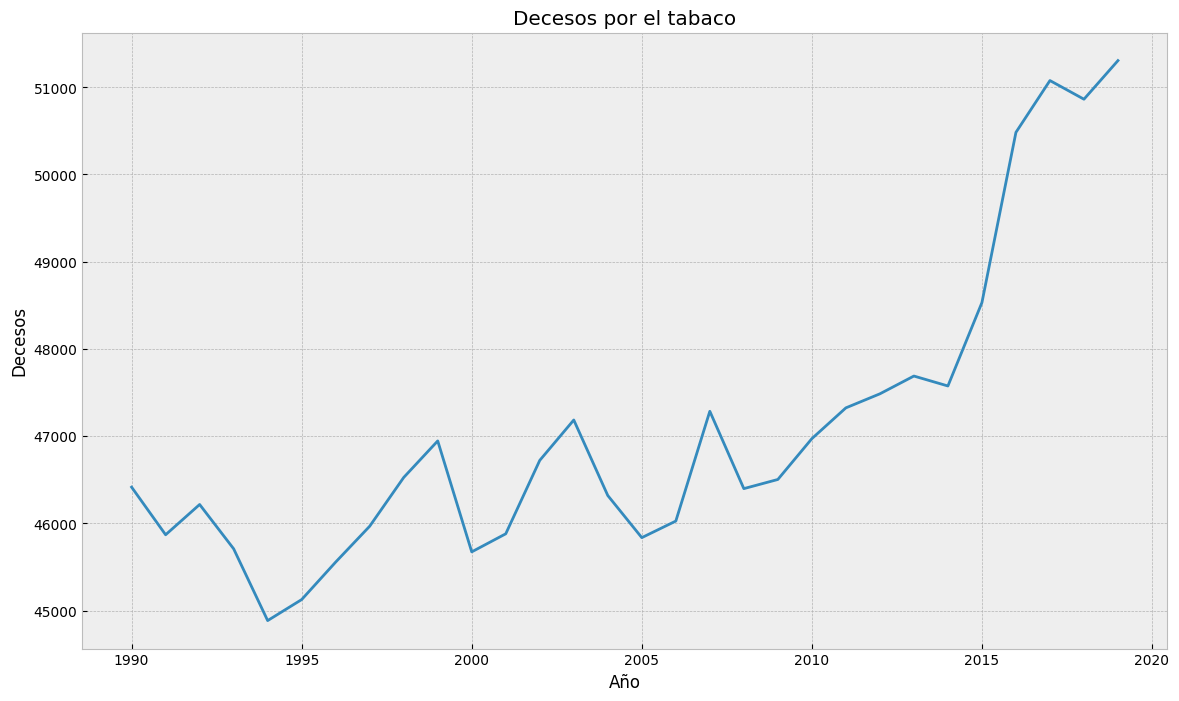

In [32]:
mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(x,arg_tab,label='Causas de decesos por el tabaco')
ax.set_xlabel('Año')
ax.set_ylabel('Decesos')
ax.set_title('Decesos por el tabaco')
plt.show()

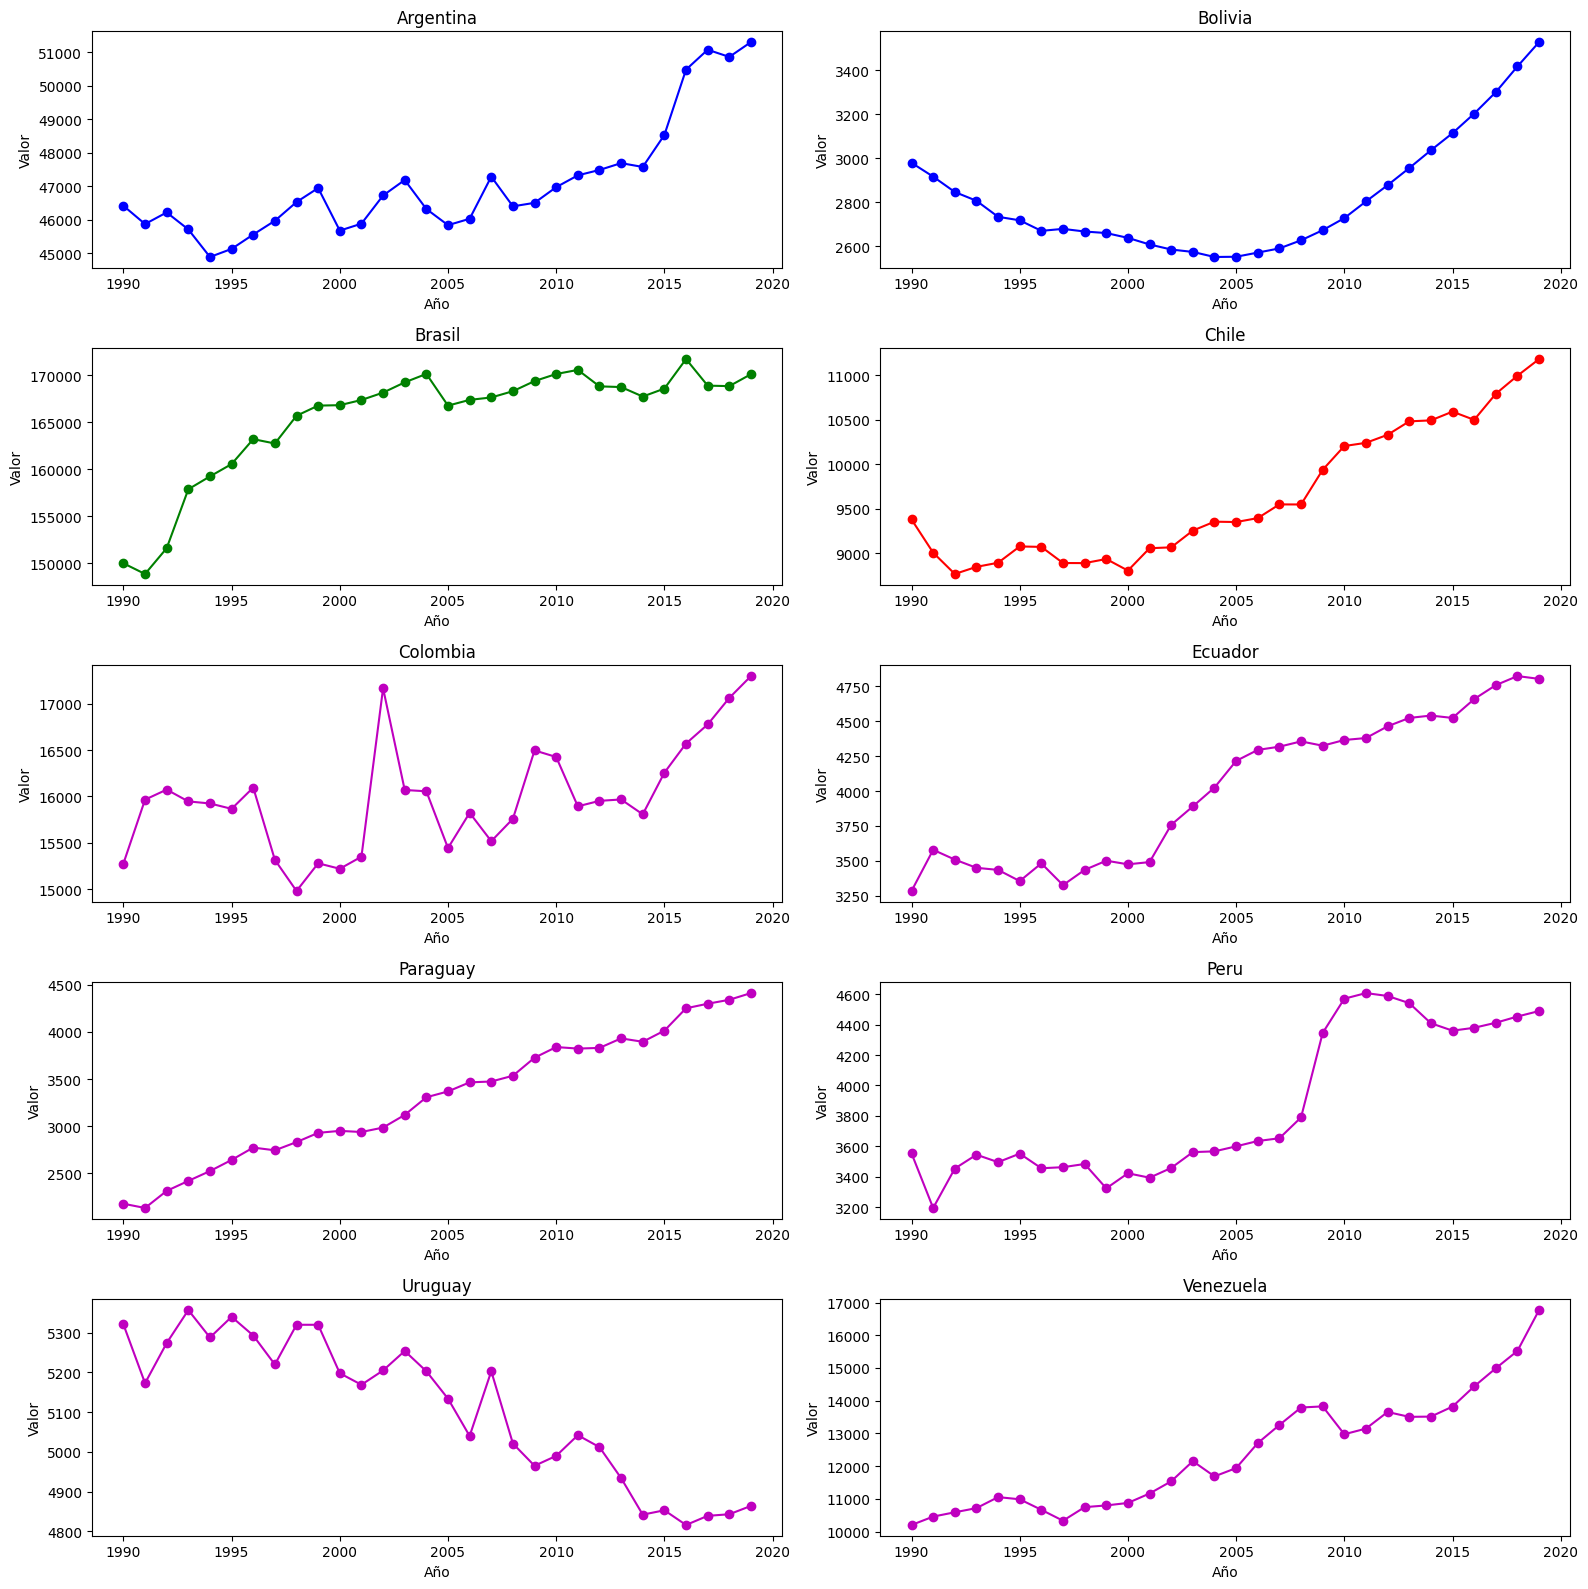

In [74]:
# Datos de los cuatro conjuntos
mpl.style.use('default')
# Crear un marco con 5 filas y 2 columnas (10 subgráficos)
fig, axs = plt.subplots(5, 2, figsize=(16, 16))

# Argentina
axs[0, 0].plot(x, arg_tab, marker='o', color='b')
axs[0, 0].set_title('Argentina')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Valor')

# Bolivia
axs[0, 1].plot(x, bol_tab, marker='o', color='b')
axs[0, 1].set_title('Bolivia')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Valor')

# Brasil
axs[1, 0].plot(x, bra_tab, marker='o', color='g')
axs[1, 0].set_title('Brasil')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Valor')

# Chile
axs[1, 1].plot(x, chl_tab, marker='o', color='r')
axs[1, 1].set_title('Chile')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Valor')

# Colombia
axs[2, 0].plot(x, col_tab, marker='o', color='m')
axs[2, 0].set_title('Colombia')
axs[2, 0].set_xlabel('Año')
axs[2, 0].set_ylabel('Valor')

# Ecuador
axs[2, 1].plot(x, ecu_tab, marker='o', color='m')
axs[2, 1].set_title('Ecuador')
axs[2, 1].set_xlabel('Año')
axs[2, 1].set_ylabel('Valor')

# Paraguay
axs[3, 0].plot(x, pry_tab, marker='o', color='m')
axs[3, 0].set_title('Paraguay')
axs[3, 0].set_xlabel('Año')
axs[3, 0].set_ylabel('Valor')

# Peru
axs[3, 1].plot(x, per_tab, marker='o', color='m')
axs[3, 1].set_title('Peru')
axs[3, 1].set_xlabel('Año')
axs[3, 1].set_ylabel('Valor')

# Uruguay
axs[4, 0].plot(x, ury_tab, marker='o', color='m')
axs[4, 0].set_title('Uruguay')
axs[4, 0].set_xlabel('Año')
axs[4, 0].set_ylabel('Valor')

# Venezuela
axs[4, 1].plot(x, ven_tab, marker='o', color='m')
axs[4, 1].set_title('Venezuela')
axs[4, 1].set_xlabel('Año')
axs[4, 1].set_ylabel('Valor')

# Ajustar el espacio entre gráficos
fig.tight_layout()

# Mostrar la figura
plt.show()


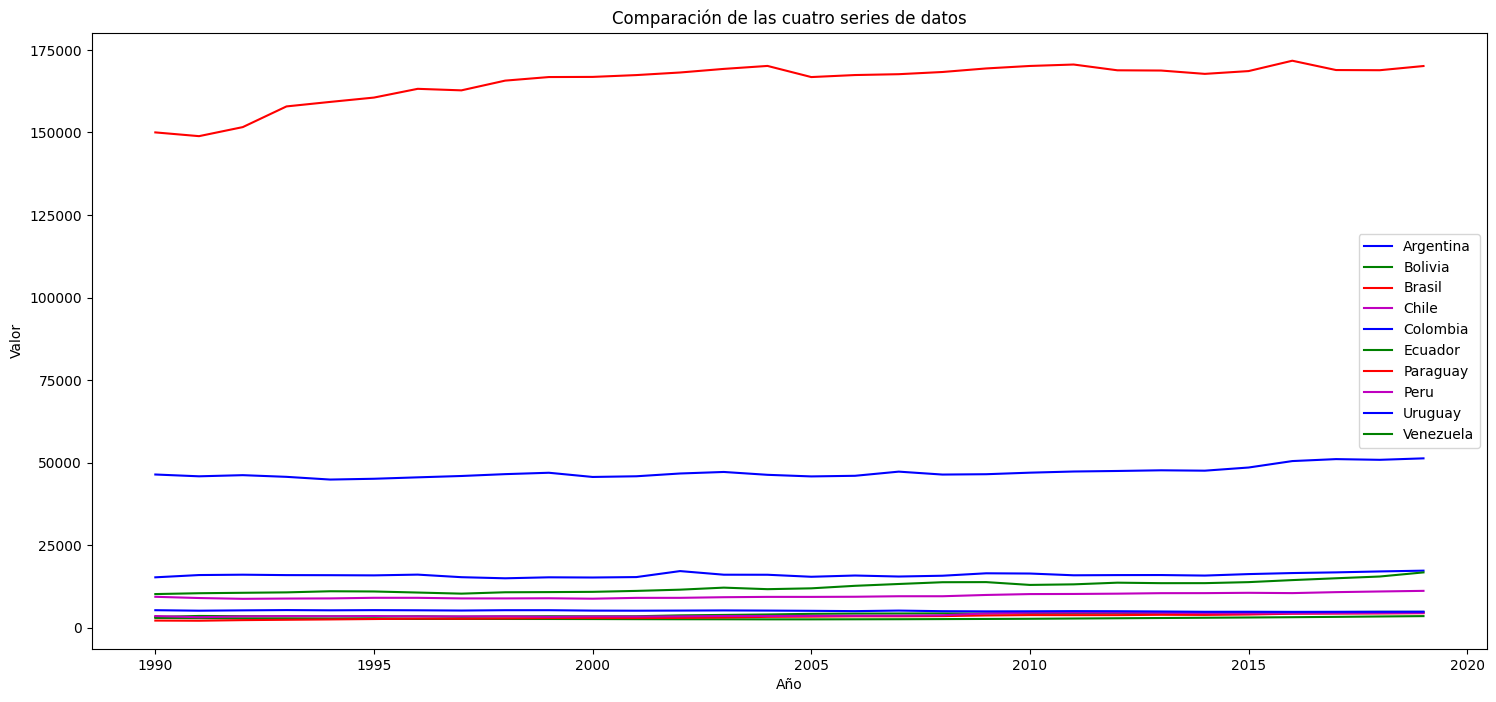

In [75]:
# Crear el gráfico comparativo grande que ocupa toda la tercera fila
# Crear un marco con 1 gráfico
fig, ax = plt.subplots(figsize=(18, 8))

# Gráfica de las cuatro series en el mismo marco
ax.plot(x, arg_tab, color='b', label='Argentina')
ax.plot(x, bol_tab, color='g', label='Bolivia')
ax.plot(x, bra_tab, color='r', label='Brasil')
ax.plot(x, chl_tab, color='m', label='Chile')
ax.plot(x, col_tab, color='b', label='Colombia')
ax.plot(x, ecu_tab, color='g', label='Ecuador')
ax.plot(x, pry_tab, color='r', label='Paraguay')
ax.plot(x, per_tab, color='m', label='Peru')
ax.plot(x, ury_tab, color='b', label='Uruguay')
ax.plot(x, ven_tab, color='g', label='Venezuela')


# Añadir título y etiquetas
ax.set_title('Comparación de las cuatro series de datos')
ax.set_xlabel('Año')
ax.set_ylabel('Valor')

# Añadir una leyenda para identificar las series
ax.legend()

# Mostrar la gráfica
plt.show()
